# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []
city_lats=[]
city_lons=[]

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    city_lat = citipy.nearest_city(lat_lng[0], lat_lng[1]).lat
    city_lon =citipy.nearest_city(lat_lng[0], lat_lng[1]).lng
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        city_lats.append(city_lat)
        city_lons.append(city_lon)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather/?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}lat={city_lats[i]}&lon={city_lons[i]}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_lats[i]
        city_lng = city_lons[i]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | khovd
Processing Record 2 of Set 1 | kruisfontein
Processing Record 3 of Set 1 | severo-yeniseyskiy
Processing Record 4 of Set 1 | palikir - national government center
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | cidade velha
Processing Record 8 of Set 1 | papatowai
City not found. Skipping...
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | katabu
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | tughyl
Processing Record 15 of Set 1 | suntar
Processing Record 16 of Set 1 | wailua homesteads
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | kenai
Processing Record 19 of Set 1 | constantia
Processing Record 20 of Set 1 | zouerate
Processing Record 21 of Set 1 | lo

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          618
Lat           618
Lng           618
Max Temp      618
Humidity      618
Cloudiness    618
Wind Speed    618
Country       618
Date          618
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,khovd,48.00556,91.64194,270.56,19,20,0.63,MN,1710567764
1,kruisfontein,-34.00333,24.73142,291.97,64,59,10.09,ZA,1710567765
2,severo-yeniseyskiy,60.37552,93.03017,262.94,89,100,5.81,RU,1710567765
3,palikir - national government center,6.92477,158.16109,301.62,84,100,5.14,FM,1710567766
4,bilibino,68.05464,166.43721,259.01,86,70,1.42,RU,1710567767


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,khovd,48.00556,91.64194,270.56,19,20,0.63,MN,1710567764
1,kruisfontein,-34.00333,24.73142,291.97,64,59,10.09,ZA,1710567765
2,severo-yeniseyskiy,60.37552,93.03017,262.94,89,100,5.81,RU,1710567765
3,palikir - national government center,6.92477,158.16109,301.62,84,100,5.14,FM,1710567766
4,bilibino,68.05464,166.43721,259.01,86,70,1.42,RU,1710567767


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

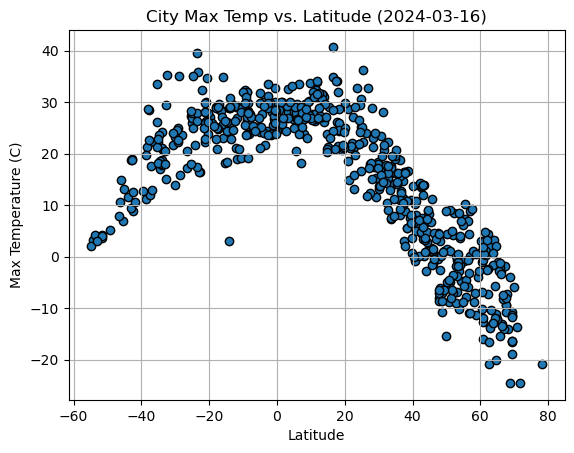

In [9]:
# Build scatter plot for latitude vs. temperature
x_lats=city_data_df["Lat"]
y_temps=city_data_df["Max Temp"]-273.15
plt.scatter(x_lats,y_temps,edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Temp vs. Latitude (2024-03-16)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

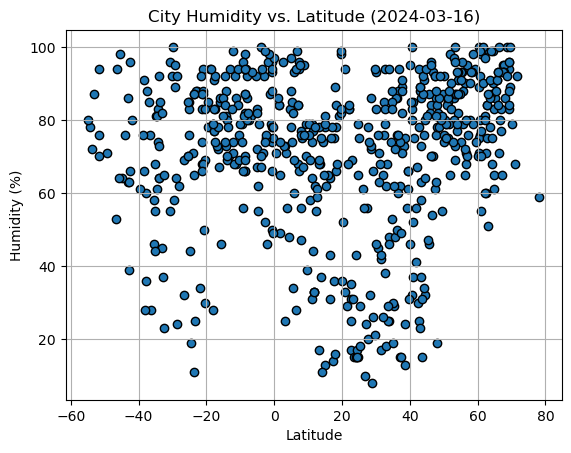

In [10]:
# Build the scatter plots for latitude vs. humidity
y_hum=city_data_df["Humidity"]
plt.scatter(x_lats,y_hum,edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Humidity vs. Latitude (2024-03-16)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

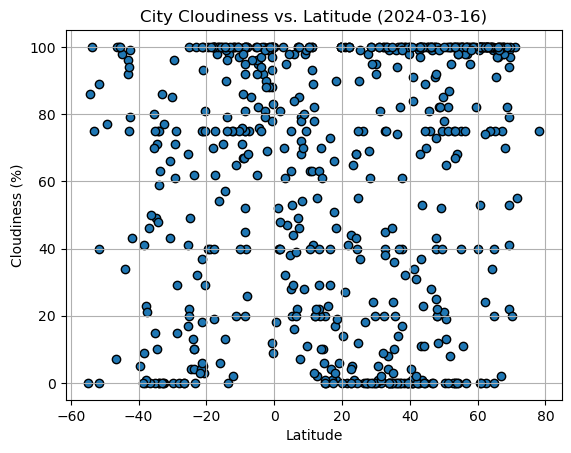

In [11]:
# Build the scatter plots for latitude vs. cloudiness
y_cld=city_data_df["Cloudiness"]
plt.scatter(x_lats,y_cld,edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Cloudiness vs. Latitude (2024-03-16)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

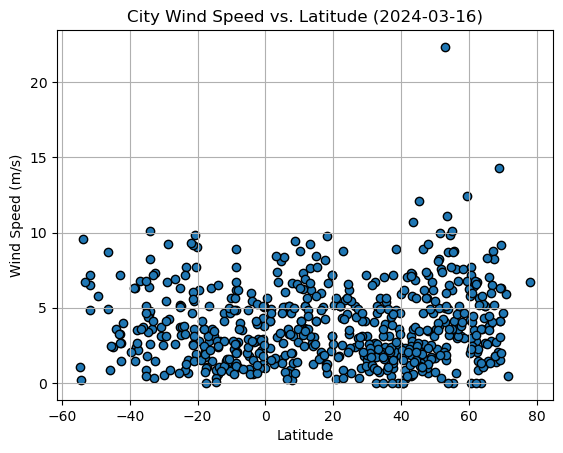

In [12]:
# Build the scatter plots for latitude vs. wind speed
y_wind=city_data_df["Wind Speed"]
plt.scatter(x_lats,y_wind,edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Wind Speed vs. Latitude (2024-03-16)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,khovd,48.00556,91.64194,270.56,19,20,0.63,MN,1710567764
2,severo-yeniseyskiy,60.37552,93.03017,262.94,89,100,5.81,RU,1710567765
3,palikir - national government center,6.92477,158.16109,301.62,84,100,5.14,FM,1710567766
4,bilibino,68.05464,166.43721,259.01,86,70,1.42,RU,1710567767
6,cidade velha,14.91531,-23.60527,294.36,78,20,4.12,CV,1710567768


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kruisfontein,-34.00333,24.73142,291.97,64,59,10.09,ZA,1710567765
5,grytviken,-54.28111,-36.50920,276.45,78,86,0.17,GS,1710567767
7,hermanus,-34.41870,19.23446,290.26,83,75,4.59,ZA,1710567769
8,waitangi,-43.95353,-176.55973,284.72,76,34,3.58,NZ,1710567769
9,katabu,-4.93330,122.51670,304.93,55,95,1.79,ID,1710567660


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.8408497817122756


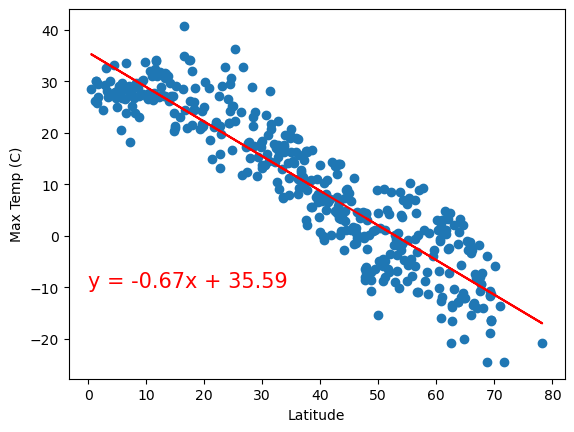

In [15]:
# Linear regression on Northern Hemisphere
x_vals=northern_hemi_df["Lat"]
y_vals=northern_hemi_df["Max Temp"]-273.15
plt.scatter(x_vals,y_vals)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
slope,int,r_val,stdev,sterr=linregress(x_vals,y_vals)
fit_line=slope*x_vals+int
plt.plot(x_vals,fit_line,"r-")
line_str=f"y = {str(round(slope,2))}x + {str(round(int,2))}"
plt.annotate(line_str,(0,-10),fontsize=15,color="red")
print(f"The r-squared value is: {(r_val**2)}")
plt.show()

The r-squared value is: 0.43397464572425687


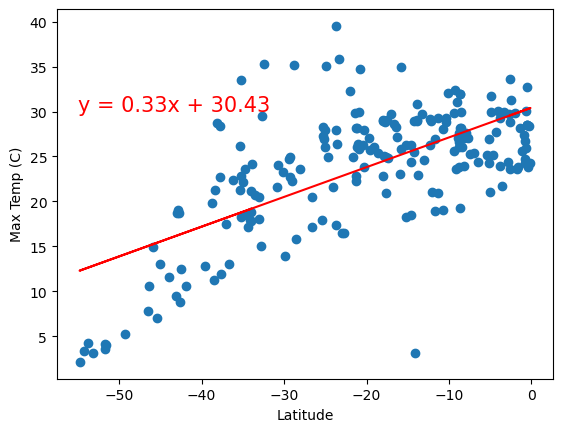

In [16]:
# Linear regression on Southern Hemisphere
x_vals=southern_hemi_df["Lat"]
y_vals=southern_hemi_df["Max Temp"]-273.15
plt.scatter(x_vals,y_vals)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
slope,int,r_val,stdev,sterr=linregress(x_vals,y_vals)
fit_line=slope*x_vals+int
plt.plot(x_vals,fit_line,"r-")
line_str=f"y = {str(round(slope,2))}x + {str(round(int,2))}"
plt.annotate(line_str,(-55,30),fontsize=15,color="red")
print(f"The r-squared value is: {(r_val**2)}")
plt.show()

**Discussion about the Temp vs Latitude relationship:**

When split into hemispheres, it appears that the relationships between temperature and latitude are opposites for northern vs southern hemisphere. However, the highest temperatures are latitudes closest to zero in both cases. For Northern Hemisphere, 0 degrees is on the left of the graph, and in the Southern Hemisphere graph 0 degrees is on the right. The r-squared value is weaker in the Southern Hemisphere than Northern. This could be because a lot of the landmass in the Southern Hemisphere is closer to the equator than the landmass in the Northern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.11048410170768945


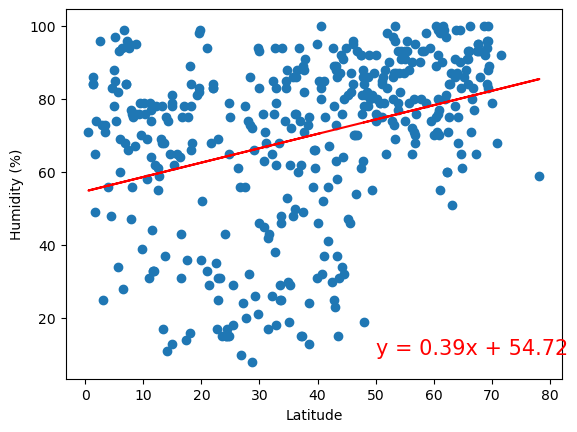

In [17]:
# Northern Hemisphere
x_vals=northern_hemi_df["Lat"]
y_vals=northern_hemi_df["Humidity"]
plt.scatter(x_vals,y_vals)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
slope,int,r_val,stdev,sterr=linregress(x_vals,y_vals)
fit_line=slope*x_vals+int
plt.plot(x_vals,fit_line,"r-")
line_str=f"y = {str(round(slope,2))}x + {str(round(int,2))}"
plt.annotate(line_str,(50,10),fontsize=15,color="red")
print(f"The r-squared value is: {(r_val**2)}")
plt.show()

The r-squared value is: 0.04406232934439338


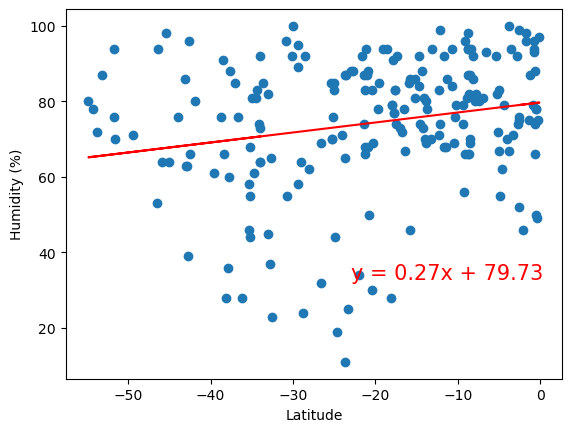

In [18]:
# Southern Hemisphere
x_vals=southern_hemi_df["Lat"]
y_vals=southern_hemi_df["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(x_vals,y_vals)
slope,int,r_val,stdev,sterr=linregress(x_vals,y_vals)
fit_line=slope*x_vals+int
plt.plot(x_vals,fit_line,"r-")
line_str=f"y = {str(round(slope,2))}x + {str(round(int,2))}"
plt.annotate(line_str,(-23,33),fontsize=15,color="red")
print(f"The r-squared value is: {(r_val**2)}")
plt.show()

**Discussion about the Humidity vs Latitude relationship:**

These lines are pretty similar for Northern and Southern Hemispheres. The r-squared values for both hemispheres is relatively low, meaning a very loose correlation. Oddly enough, the Northern Hemisphere's regression line indicates that the higher latitudes tend to be more humid, while in the Southern Hemisphere the lower latitudes (closer to the equator) tend to be more humid.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.07779601505897671


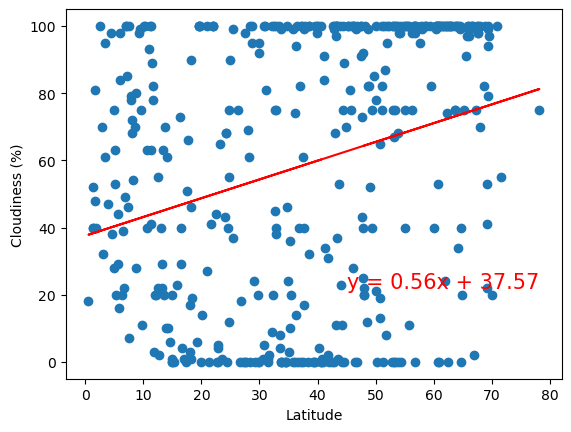

In [19]:
# Northern Hemisphere
x_vals=northern_hemi_df["Lat"]
y_vals=northern_hemi_df["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(x_vals,y_vals)
slope,int,r_val,stdev,sterr=linregress(x_vals,y_vals)
fit_line=slope*x_vals+int
plt.plot(x_vals,fit_line,"r-")
line_str=f"y = {str(round(slope,2))}x + {str(round(int,2))}"
plt.annotate(line_str,(45,22),fontsize=15,color="red")
print(f"The r-squared value is: {(r_val**2)}")
plt.show()

The r-squared value is: 0.12762894807843272


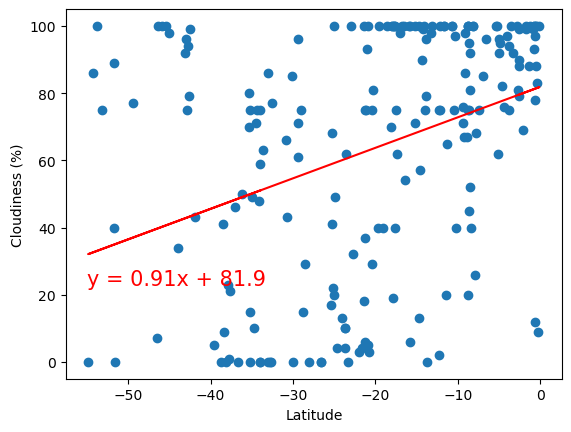

In [20]:
# Southern Hemisphere
x_vals=southern_hemi_df["Lat"]
y_vals=southern_hemi_df["Cloudiness"]
plt.scatter(x_vals,y_vals)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
slope,int,r_val,stdev,sterr=linregress(x_vals,y_vals)
fit_line=slope*x_vals+int
plt.plot(x_vals,fit_line,"r-")
line_str=f"y = {str(round(slope,2))}x + {str(round(int,2))}"
plt.annotate(line_str,(-55,23),fontsize=15,color="red")
print(f"The r-squared value is: {(r_val**2)}")
plt.show()

**Discussion about the Cloudiness vs Latitude relationship:**

The r-squared values for both hemispheres is pretty low, meaning there isn't a very strong correlation between latitude and cloudiness. There seems to be little difference in distribution between the hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.004587703276019568


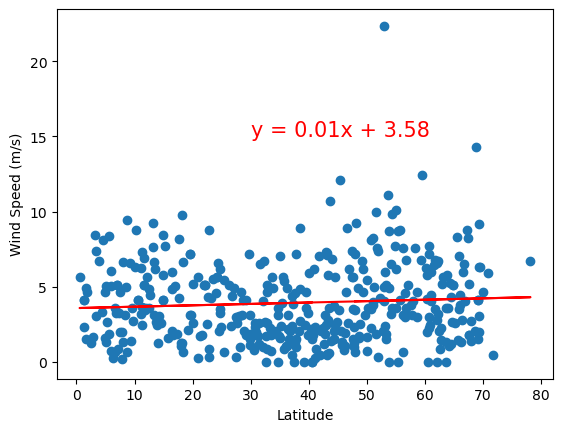

In [21]:
# Northern Hemisphere
x_vals=northern_hemi_df["Lat"]
y_vals=northern_hemi_df["Wind Speed"]
plt.scatter(x_vals,y_vals)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
slope,int,r_val,stdev,sterr=linregress(x_vals,y_vals)
fit_line=slope*x_vals+int
plt.plot(x_vals,fit_line,"r-")
line_str=f"y = {str(round(slope,2))}x + {str(round(int,2))}"
plt.annotate(line_str,(30,15),fontsize=15,color="red")
print(f"The r-squared value is: {(r_val**2)}")
plt.show()

The r-squared value is: 0.0560917066187406


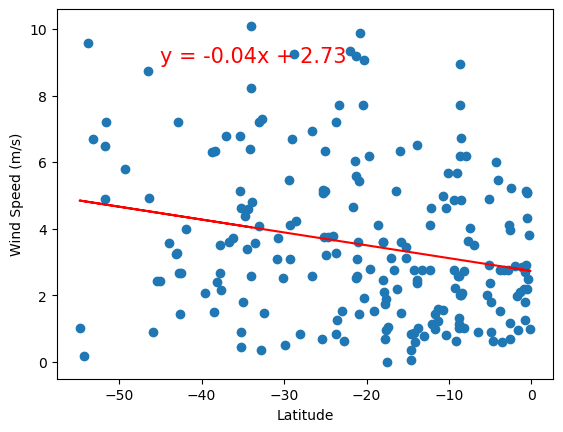

In [24]:
# Southern Hemisphere
x_vals=southern_hemi_df["Lat"]
y_vals=southern_hemi_df["Wind Speed"]
plt.scatter(x_vals,y_vals)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
slope,int,r_val,stdev,sterr=linregress(x_vals,y_vals)
fit_line=slope*x_vals+int
plt.plot(x_vals,fit_line,"r-")
line_str=f"y = {str(round(slope,2))}x + {str(round(int,2))}"
plt.annotate(line_str,(-45,9),fontsize=15,color="red")
print(f"The r-squared value is: {(r_val**2)}")
plt.show()

**Discussion about the Wind vs Latitude relationship:**

The relationship between latitude and wind speed is very weak - the r-squared values for both hemispheres is low. The ranges for both hemispheres seem similar - with just a handful of outliers. The slopes of both regression lines are very low, meaning that there is little difference in wind speeds across latitudes (overall).